
## *Pitch detection over time*

- [Aubio](https://aubio.org/manual/latest/)
- [Aubio pitch methods](https://aubio.org/manpages/latest/aubiopitch.1.html)


In [2]:
import os
import sys
import numpy as np
from numpy import ma
from aubio import source, pitch
from matplotlib import pyplot as plt

os.chdir('/home/sharedfolder')

%matplotlib inline

In [3]:

filename = "09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav"


downsample = 1
samplerate = 44100 // downsample

win_s = 2048 // downsample # fft size
hop_s = 512  // downsample # hop size

s = source(filename, samplerate, hop_s)
samplerate = s.samplerate

tolerance = 0.8

pitch_o = pitch("yinfft", win_s, hop_s, samplerate)
pitch_o.set_unit("Hz")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []


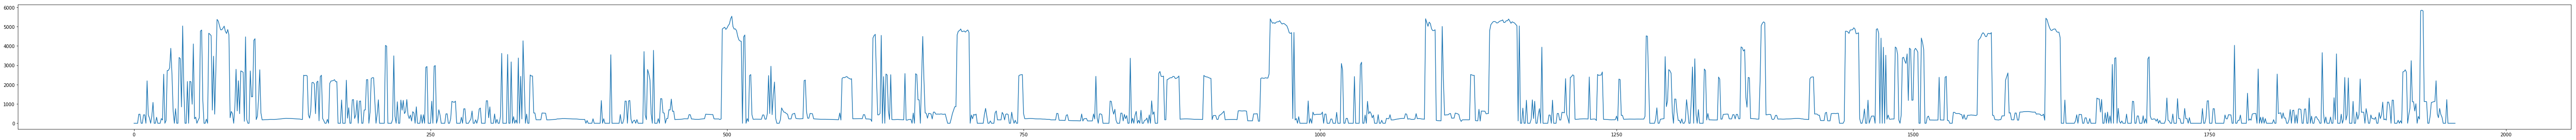

In [4]:

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    #pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    #print("%f %f %f" % (total_frames / float(samplerate), pitch, confidence))
    pitches += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s: break

plt.figure(figsize=(100,5))
plt.plot(pitches)

plt.show()


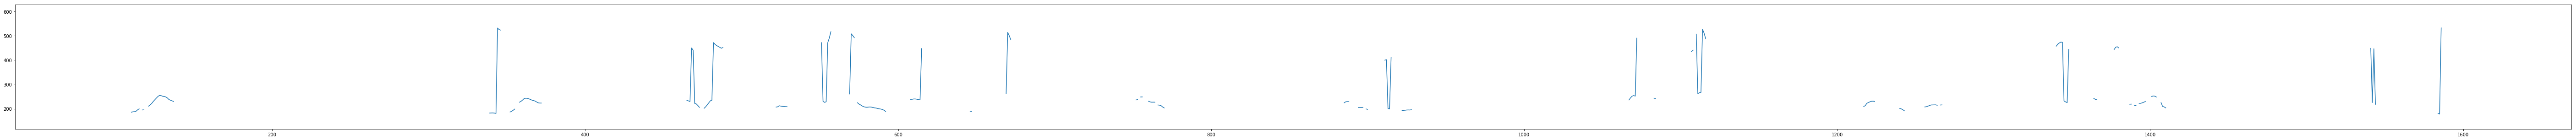

In [5]:

pitches = np.array(pitches)
confidences = np.array(confidences)

cleaned_pitches = ma.masked_where(confidences < tolerance, pitches)
cleaned_pitches = ma.masked_where(cleaned_pitches > 1000, cleaned_pitches)

plt.figure(figsize=(100,5))
plt.plot(cleaned_pitches)
plt.show()


In [6]:

np.mean(cleaned_pitches)

272.51198122529644

(array([ 1399.,   132.,    45.,    55.,   108.,    26.,    29.,    43.,
          100.,    21.]),
 array([    0.        ,   584.52563477,  1169.05126953,  1753.5769043 ,
         2338.10253906,  2922.62817383,  3507.15380859,  4091.67944336,
         4676.20507812,  5260.73071289,  5845.25634766]),
 <a list of 10 Patch objects>)

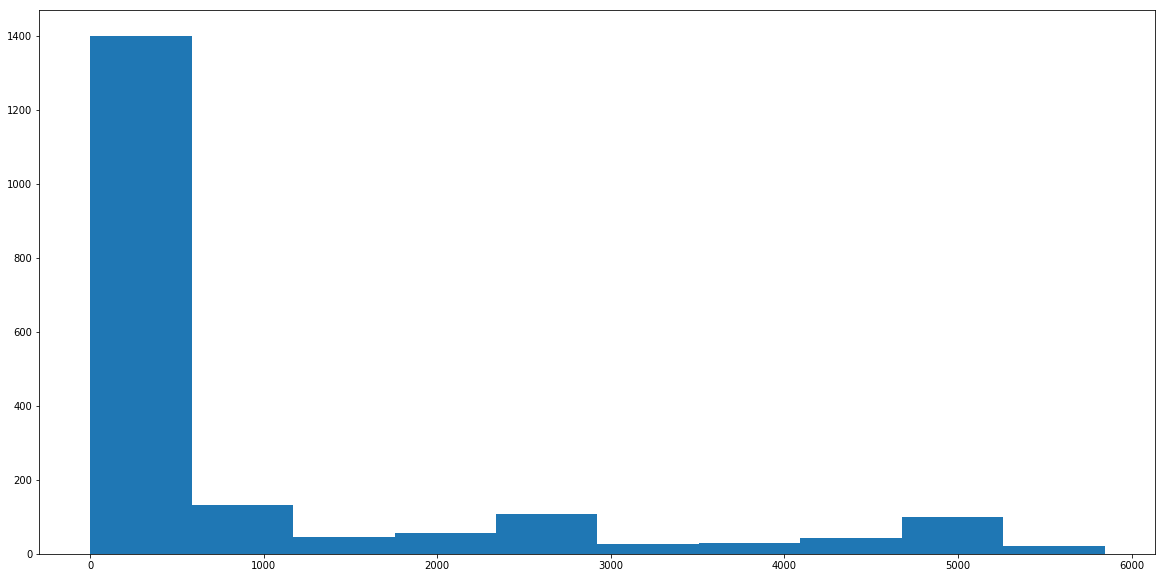

In [7]:

plt.figure(figsize=(20,10))
plt.hist(cleaned_pitches)